<a href="https://colab.research.google.com/github/maleiss2/MAE421/blob/main/ModuleB(17_1_17_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **17.1 Interpolation**

While extrapolation makes estimates outside the bounds of the data, interpolation makes estimates within the range of the known data. Because interpolation might provide a more precise assessment of an unknown value than extrapolation, statistical specialists could prefer it.

To research the the projectile of a stone, physicists gathers data on time and velocity. They keep track of the historical data. With the help of the historical data, The physicists can forecast the the projection of a stone for the next time using the available data, even if some of the statistics are lacking. This method interpolates data points that fall inside the current data points' range. Definition of Interpolation problem: Given 𝑛+1 distinct points (𝑡0,𝑦0),(𝑡1,𝑦1),…,(𝑡𝑛,𝑦𝑛), with 𝑡0<𝑡1<…<𝑡𝑛, find a function 𝑝(𝑥), called the interpolant, such that 𝑝(𝑡𝑘)=𝑦𝑘 for 𝑘=0,…,𝑛.

Calculating a value from a collection of data points.

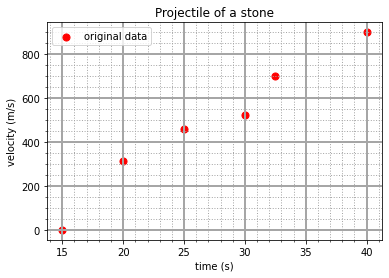

In [ ]:
# Perquisites
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.interpolate

time=np.array([15,20,25,30,32.5,40])
velocity=np.array([0,314.09,456.87,523.71,699.15,898.39])

plt.close('all')
plt.figure(1)
plt.grid(axis='both',which='major',color=[166/255,166/255,166/255], linestyle='-', linewidth=2)
plt.minorticks_on()
plt.grid(axis='both',which='minor',color=[166/255,166/255,166/255], linestyle=':', linewidth=1)
plt.xlabel('time (s)')         
plt.ylabel('velocity (m/s)')        
plt.title('Projectile of a stone') 
plt.scatter(time,velocity,50,[255/255,0/255,0/255],label='original data')
plt.legend(loc='upper left')

## **17.2 Linear Interpolation**
When the values of two neighbouring points are known, the method of linear interpolation is used to calculate the values of any intervening points' functions. In its simplest form, linear interpolation is the estimation of an unknown value that is between two known values. Numerous fields, including statistics, economics, and price determination, use linear interpolation. In order to maintain the consistency of the information, it is utilised to fill in the gaps in the statistical data.

Linear Interpolation : y(x) = y1 + (x - x1) \frac{(y2 - y1) }{ (x2 - x1)}
The initial data point's coordinates are (x1, y1). And the second data point's coordinates are (x2,y2), where x is the starting point for the interpolation and y is the result.

Let's use an illustration to help you understand. The following data values are available, where x stands for a number and y is a function of x's square root. Finding 5.5's square root is our task (x).

x=1,2,3,4,5,6

y ( f(x) = √x )=1,1.4142,1.7320,2,2.2360,2.4494

Here, we can apply the linear interpolation technique.

1. Find the two adjacent (x1, y1) ,(x2,y2) from the x. i.e. (5,2.2360) and (6,2.4494).

  Where x1 = 5, x2= 6, y1 = 2.2360, y2 = 2.4494, and we interpolate at point x = 5.5.

2. Using the formula y(x) = y1 + (x – x1) \frac{(y2 – y1) }{ (x2 – x1)} y(x) = y1 + (x - x1) \frac{(y2 - y1) }{ (x2 - x1)}
3. Put the values in the above equation.

y = 2.2360+(5.5-5)\frac{(2.4494-2.2360)}{(6 - 5)}

y = 2.3427 Y will have a value of 2.3427 at x = 5.5. Thus, finding the value of a function between two intervals is simple using linear interpolation.

Approach:

Let us now use the formula Linear Interpolation : y(x) = y1 + (x - x1) \frac {(y2 - y1) }{ (x2 - x1)}

Example: Suppose we have a dataset of the population of a city and the year.

X= [2000,2001,2002,2003,2005] 

Y= [20500,40000,78000,145000,250000]

Here, Y is the population of any city, and X is the current year. It is our responsibility to determine the city's population in 2020.

We choose our (x1, y1) ,(x2,y2) as x1=2003 , y1=145000, x2=2002, y2=78000, x = 2004, y = ?

Here, the year x is the one for which we wish to forecast the value of the y population, and (x1, y1) and (x2, y2) are two neighbouring points.



In [ ]:
# Developing a function for linear interpolation
 
def interpolation(i, x):
    interpolation_formula = i[0][1] + (x - i[0][0]) * ((i[1][1] - i[0][1])/(i[1][0] - i[0][0]))
 
    return interpolation_formula

data_available=[[2003, 145000],[2002, 78000]]
 
year_x=2004
 
# Finding the interpolation
print("Year {}'s population is".format(year_x),
             interpolation(data_available, year_x))

Year 2004's population is 212000.0


## **17.3 Cubic Spline Interpolation**
Finding a curve that connects data points with a degree of three or less is possible through the use of cubic spline interpolation. Splines are polynomials that have continuous first and second derivatives at their intersections and are smooth and continuous across a specified plot.

For the function y = f, we take a collection of points [xi, yi] for i = 0, 1,..., n. (x). Each value in the table is traversed by the piecewise continuous cubic spline interpolation curve.

The prerequisites for the spline with degree K=3 are as follows:
The range [a, b] is the domain of the function s.
On [a, b], S, S', and S" are all continuous functions.
S(x) =\begin{bmatrix} S_0 (x), x \epsilon [x_0, x_1] \\ S_1 (x), x \epsilon [x_1, x_2] \\ ... \\ ... \\ ... \\ S_{n-1} (x), x \epsilon [x_1, x_2] \end{bmatrix}

Here Si(x) is the cubic polynomial that will be used on the subinterval [xi, xi+1]. 

The fundamental benefit of splines is that they blend various polynomials rather than using a single polynomial of degree n to fit all the points simultaneously. This prevents the usage of high degree polynomials and, consequently, the risk of overfitting. These low-degree polynomials must be chosen so that the spline they generate is both smooth and continuous.

However, the joining of the two consecutive polynomials and Si (x) and Si+1 (x) is necessary for the spline to be continuous and smooth.
S_i (x_i) = S_{i+1} (x_i)= f(x_i) = y_i

Or, Si (x) must be passed through two end-points:

S_{i-1} (x_{i-1}) = S_{i} (x_i)= f(x_{i-1}) ; S_i (x_i) = S_{i+1} (x_i)= f(x_i) = y_i 

Assume, S” (x) = Mi (i= 0,1,2, …, n). Since S(x) is cubic polynomial, so S” (x) is the linear polynomial in [xi, xi+1], then S”’ (x) will be:

S''' (x) = \frac{M_{i+1} - M_i }{x_{i+1} - x_i} \, \forall x \epsilon [x_i, x_{i+1}]

By applying the Taylor series:

S(x) = S(x_i) + S'(x_i)(x-x_{i}) + \frac{S'' (x)}{2!}(x-x_i)^{2} + \frac{M_{i+1}-M_i}{3! (x_{i+1} - x_i)} (x -x_i)^{3}

Let, x = xi+1:

y_{i+1} = y_i + S'(x_i)(x_{i+1} - x_i) + \frac{M_i}{2!}(x_{i+1} - x_i)^{2} + \frac{M_{i+1} - M_i}{3!} (x_{i+1} - x_i)^{2} \\ \\ \\ S'(x_i) = \frac{y_{i+1} - y_i}{x_{i+1} -x_i} - \frac{1}{6}(M_{i+1} + 2M_i)(x_{i+1}- x_i)        

Similarly, we apply above equation b/w range [xi-1, xi]:

S'(x_i) = \frac{y_{i} - y_{i-1}}{x_{i} -x_{i-1}} - \frac{1}{6}(M_{i} + 2M_{i-1})(x_{i}- x_{i-1}) 

Let hi =xi – xi-1

\mu_i = \frac{h_i }{h_{i+1} + h_i} \\ \\ \lambda_i = 1-\mu_i =  \frac{h_{i+1} }{h_{i+1} + h_i}

We currently have n-1 equations with n+1 variables, namely M0, M1, M2,... Mn-1, Mn. We must therefore obtain two more equations. We'll use additional boundary conditions for that.

If S' (x0) and S' (xn) are both 0, let's assume that we know S' (x0) = f0' and S' (xn) = fn'. The clamped border condition refers to this.
S_{1}'(x_0) = \frac{y_{1} - y_{0}}{h_i} - \frac{1}{6}(M_{1} + 2M_{0})(h_1) 

f_{0}^{'} = - M_0 \frac{h}{2} + f[x_0, x_1] - \frac{M_1 - M_0}{6}h_1

2M_0 + M_1 = \frac{6}{h_1} (f[x_0, x_1] - f_{0}')

Similarly, for Mn

2M_{n} + M_{n-1} = \frac{6}{h_n} (f_{n}' -f[x_{n-1}, x_n]  )

or

2M_{n} + M_{n-1} = {6}f[x_0, x_0, x_1] \\ d_n = f[x_{n-1}, x_n, x_n]

Concatenating these above equations in to the matrix form, the result will be the following matrix:

\begin{bmatrix} 2&  \lambda_0 &  &  &  &  &  &  &  &  &  &  & \\ \mu_1&  2&  \lambda_1&  &  &  &  &  &  &  &  &  & \\ &  .&  .&  .&  &  &  &  &  &  &  &  & \\ &  &  .&  .&  .&  &  &  &  &  &  &  & \\ &  &  &  .&  .&  .&  &  &  &  &  &  & \\ &  &  &  &  .&  .&  .&  &  &  &  &  & \\ &  &  &  &  &  .&  .&  .&  &  &  &  & \\ &  &  &  &  &  &  .&  .&  .&  &  &  & \\ &  &  &  &  &  &  & & \mu_{n-1}&  2&  \lambda_{n-1}&  &   \\ &  &  &  &  &  &  &  &  &  &  \mu_n&  2& \\ \end{bmatrix} \begin{bmatrix} M_0 \\ M_1\\ .\\ .\\ .\\ .\\ .\\ .\\ M_{n-1}\\ M_n \end{bmatrix} = \begin{bmatrix} d_0 \\ d_1 \\ .\\ .\\ .\\ .\\ .\\ .\\ d_{n-1}\\ d_n \end{bmatrix}

To achieve the linear spline interpolation, we will use the Scipy. We shall interpolate the function f(x) =1/(1+x2) using the Cubic Spline and the interpert function of Scipy.

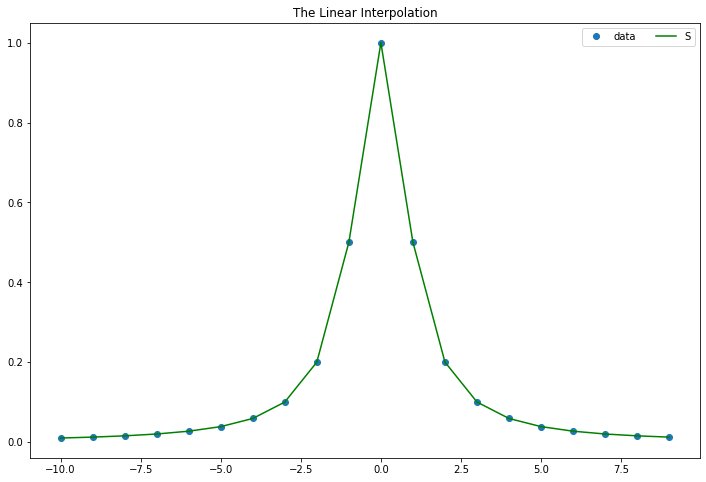

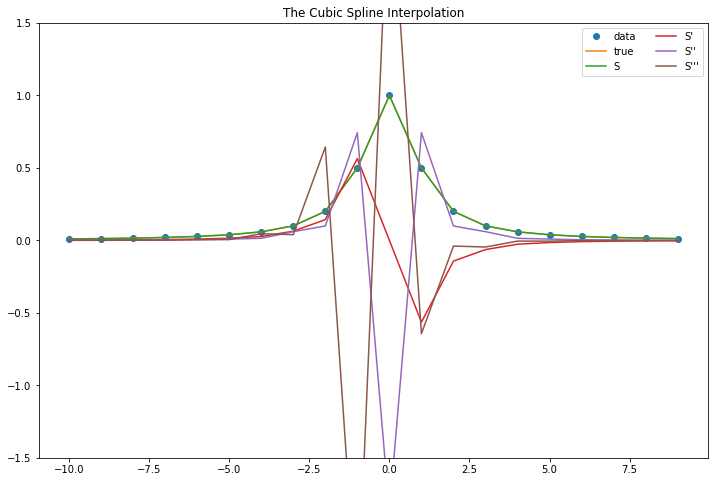

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
plt.rcParams['figure.figsize'] =(12,8)
  
x_axis = np.arange(-10,10)
y_axis = 1/(1+x_axis**2)
# let us implement the cubic spline interpolation
cs = CubicSpline(x_axis, y_axis)

# Then, when we apply the linear interpolation
linear_interpolation = interp1d(x_axis,y_axis)
  
xs_axis = np.arange(-10, 10)
ys_axis = linear_interpolation(xs_axis)
  
# plot linear interpolation
plt.plot(x_axis, y_axis, 'o', label='data')
plt.plot(xs_axis,ys_axis,  label="S", color='green')
plt.legend(loc='upper right', ncol=2)
plt.title('The Linear Interpolation')
plt.show()
  
# plot cubic spline interpolation
plt.plot(x_axis, y_axis, 'o', label='data')
plt.plot(xs_axis, 1/(1+(xs_axis**2)), label='true')
plt.plot(xs_axis, cs(xs_axis), label="S")
plt.plot(xs_axis, cs(xs_axis, 1), label="S'")
plt.plot(xs_axis, cs(xs_axis, 2), label="S''")
plt.plot(xs_axis, cs(xs_axis, 3), label="S'''")
plt.ylim(-1.5, 1.5)
plt.legend(loc='upper right', ncol=2)
plt.title('The Cubic Spline Interpolation')
plt.show()

References:

1. https://www.mathsisfun.com/definitions/interpolation.html
2. https://fncbook.github.io/fnc/localapprox/interpolation.html
3. https://www.geeksforgeeks.org/how-to-implement-linear-interpolation-in-python/
4. Wikidiversity Cubic Spline Interpolation
